In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
import ast
nltk.download('stopwords') 
import numpy as np
from nltk.corpus import stopwords 
import csv
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk import tokenize
import re
from tqdm.notebook import tqdm
#from gensim import models, corpora
from nltk import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('Juarez_words_full.csv')
df_words = df[['Palavras']]
df_words['Palavras'] = df_words['Palavras'].apply(ast.literal_eval)


stop_words = stopwords.words('portuguese')
stop_words_manual = ['to','pt','sobre','ca','si','al','ra','ainda','ai','so','ta','ae','fl','in','oa','fi','at','co','li','ti','qualquer','ha','dr','sa','ter','be','tal','ar','sob','onde','es','ma','of','ri','re','ir','assim','la','sempre','desde','cl','jl','is','mo','am','ac','it','oe','an','st','ro','or','en','vez','on','pa','io','dc','lo','deste','alguns','fa','pe','mi','lu','mm','va','pis','ua','af','agora','ce','le','il','he','vossa','via','pi','ne','des','ali','pr','om','quais','nesse','alguma','el','cr','az','aj','aue','ei','au','demais','nessa','av','qua','ul','ho','et','po','vo','perante','ve','pu','di','ap','tr','ie','su','ui','un','ad','per','nt','logo','go','ji','du','bo','fo','er','jo','mu']

stop_words = set(stop_words + stop_words_manual)

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def retirar_stop_words(x):
    words = [i for i in x if i not in stop_words]
    return words

In [ ]:
df_words['Palavras'] = df_words['Palavras'].apply(retirar_stop_words) 

df_words['Palavras'] = df_words['Palavras'].apply(lambda x: ' '.join(word for word in x))

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data = []
for index, row in df_words.iterrows():
    data.append(row['Palavras'])

data = [i for i in data if i != '']    

In [ ]:
def bigramas(words):
 
    bigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-1):
            break
        else:
            bigrama_obs = words[i] + '_' + words[i+1]
            bigrams.append(bigrama_obs)
 
    return bigrams

def trigramas(words):
 
    trigrams = []
 
    for i in range(0, len(words)):
        if (i == len(words)-2):
            break
        else:
            try:
                trigrama_obs = words[i] + '_' + words[i+1] + '_' + words[i+2]
                trigrams.append(trigrama_obs)
            except:
                pass
 
    return trigrams

In [ ]:
tokenized_data = []
texto2 = []
total_unigramas = []
total_bigramas = []
total_trigramas = []

for texto in tqdm(data):
    
    xtexto = word_tokenize(texto)
#CRIAR O UNIGRAMA, BIGRAMAS, TRIGRAMAS
    unigramas = xtexto
    xbigramas = bigramas(xtexto)
    xtrigramas = trigramas(xtexto)
    xunigramas = unigramas + xbigramas + xtrigramas
    
    tokenized_data.append(xunigramas)
    texto2 = texto2 + xunigramas

#CRIAR OPÇÃO PARA MOSTRAR A FREQUENCIA SOMENTE DE UNIGRAMA , BIGRAMAS E TRIGRAMAS
    total_unigramas = total_unigramas + unigramas
    total_bigramas = total_bigramas + xbigramas
    total_trigramas = total_trigramas + xtrigramas
    
xfrequencia = texto2

In [ ]:
print("Total de Unigramas: "+ str((len(total_unigramas))))
print("Total de Bigramas: "+ str((len(total_bigramas))))
print("Total de Trigramas: "+ str((len(total_trigramas))))

Total de Unigramas: 485688
Total de Bigramas: 462610
Total de Trigramas: 442852


In [ ]:
num_freq = 1000
fdist = FreqDist(total_bigramas)

xfreq = fdist
nome_arquivo = "freq_bigrama"


with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))
    
print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)



  PALAVRA -- FREQUÊNCIA


[('telegrama_indicar', 1080),
 ('indicar_hora', 1039),
 ('entrega_receber', 886),
 ('rio_juarez', 657),
 ('recibo_entrega', 552),
 ('recibo_seguintes', 401),
 ('departamento_contem', 385),
 ('nacional_departamento', 350),
 ('seguintes_entrega', 322),
 ('s_recibo', 304),
 ('hora_recibo', 293),
 ('receber_data', 274),
 ('todos_ser', 267),
 ('ser_tempo', 260),
 ('receber_rio', 254),
 ('juarez_brasil', 250),
 ('contem_telegrama', 227),
 ('juarez_data', 213),
 ('departamento_telegrama', 204),
 ('geral_recebido', 203),
 ('general_governo', 202),
 ('amigo_bem', 175),
 ('telegrama_hora', 164),
 ('lei_art', 143),
 ('general_grande', 132),
 ('ser_quanto', 131),
 ('hora_s', 130),
 ('contem_horas', 130),
 ('horas_telegrama', 127),
 ('receber_juarez', 119),
 ('grande_menos', 118),
 ('governo_porque', 118),
 ('ser_nacional', 117),
 ('data_imprensa', 115),
 ('estar_hora', 114),
 ('melhor_juarez', 112),
 ('grande_parte', 108),
 ('hora_prezado', 107),
 ('vida_estado', 104),
 ('brasil_data', 103),
 ('ge

In [ ]:

num_freq = 1000
fdist = FreqDist(total_trigramas)

xfreq = fdist
nome_arquivo = "freq_trigrama"



with open(nome_arquivo + ".csv", "w", newline='') as fp:
    writer = csv.writer(fp,delimiter = ',')
    writer.writerows(fdist.most_common(num_freq))
    

print("\n  PALAVRA -- FREQUÊNCIA")
fdist.most_common(num_freq)



  PALAVRA -- FREQUÊNCIA


[('telegrama_indicar_hora', 941),
 ('recibo_entrega_receber', 381),
 ('recibo_seguintes_entrega', 303),
 ('seguintes_entrega_receber', 250),
 ('indicar_hora_recibo', 246),
 ('entrega_receber_data', 246),
 ('contem_telegrama_indicar', 204),
 ('departamento_telegrama_indicar', 180),
 ('departamento_contem_telegrama', 180),
 ('entrega_receber_rio', 151),
 ('hora_recibo_entrega', 145),
 ('s_recibo_seguintes', 135),
 ('nacional_departamento_contem', 120),
 ('s_recibo_entrega', 113),
 ('indicar_hora_s', 113),
 ('horas_telegrama_indicar', 110),
 ('hora_s_recibo', 106),
 ('hora_recibo_seguintes', 96),
 ('receber_data_imprensa', 94),
 ('departamento_contem_horas', 93),
 ('entrega_receber_juarez', 82),
 ('receber_rio_juarez', 73),
 ('destino_vivo_integral', 72),
 ('contem_horas_telegrama', 69),
 ('vivo_integral_francas', 68),
 ('pode_destino_vivo', 64),
 ('rio_juarez_data', 61),
 ('estar_hora_prezado', 54),
 ('nacional_departamento_telegrama', 51),
 ('indicar_hora_merecida', 51),
 ('hora_prezado

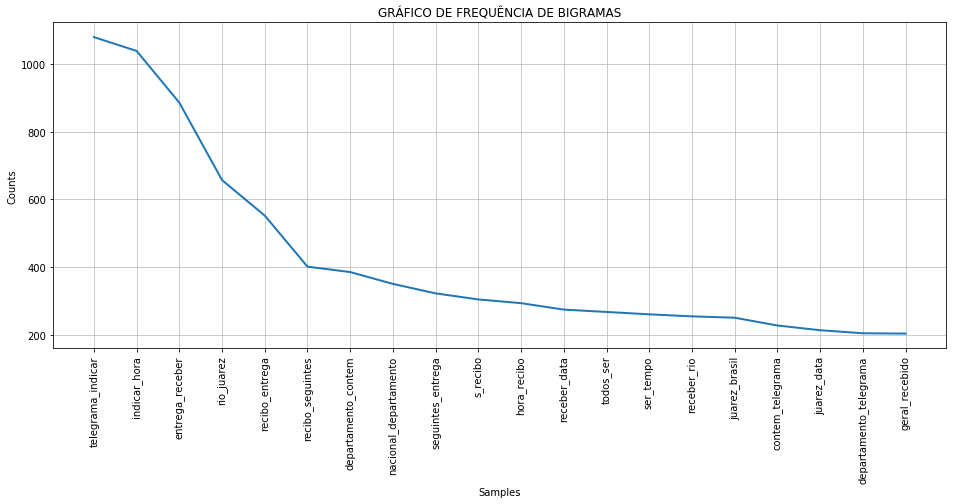

In [ ]:


num_freq = 20
#fdist.figure(figsize=(16, 10))
arquivo_grafico = total_bigramas 
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE BIGRAMAS')

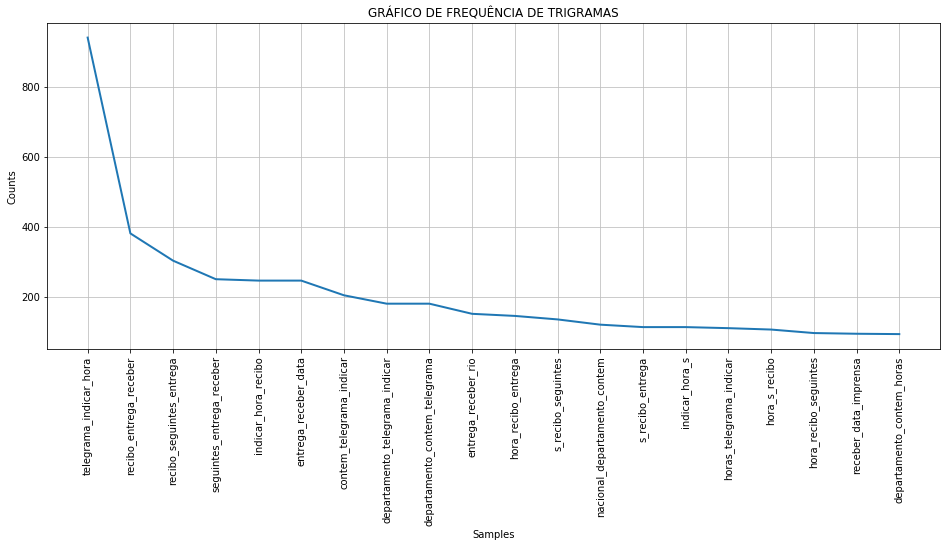

In [ ]:


num_freq = 20
#fdist.figure(figsize=(16, 10))
arquivo_grafico = total_trigramas
fdist = FreqDist(arquivo_grafico)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,6)) 
fdist.plot(num_freq,cumulative=False,title='GRÁFICO DE FREQUÊNCIA DE TRIGRAMAS')